##25 Team DIGLETT

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#IMPORT and READ

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import numpy as np
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
from matplotlib.textpath import TextPath
from matplotlib.colors import Normalize

lyrics = pd.read_json('./datasets/eurovision-lyrics-2022.json')
eurovision = pd.read_csv('./datasets/eurovision.csv')
general = pd.read_csv('./datasets/general_lyrics.csv')
jury = pd.read_csv('./datasets/jury.csv')
points = pd.read_csv('./datasets/point_diff.csv')
features = pd.read_csv('./datasets/spotify_audio_features.csv')
vote = pd.read_csv('./datasets/voteToFrom.csv')

-----------

#INFOS

In [213]:
#First Eurovision

year = eurovision['year'].min()

print("-First Eurovision Contest organization was at", year, ".")

-First Eurovision Contest organization was at 1956 .


In [214]:
#Who was the first winner

winners = eurovision[eurovision['winner'] == True]

firstWinner = winners[winners['year'] == year].artist.item()
country = winners[winners['year'] == year].artist_country.item()

print("-The First Winner of Eurovision is ", firstWinner," from ", country,".")

-The First Winner of Eurovision is  Lys Assia  from  Switzerland .


------------------------

#COUNTRIES

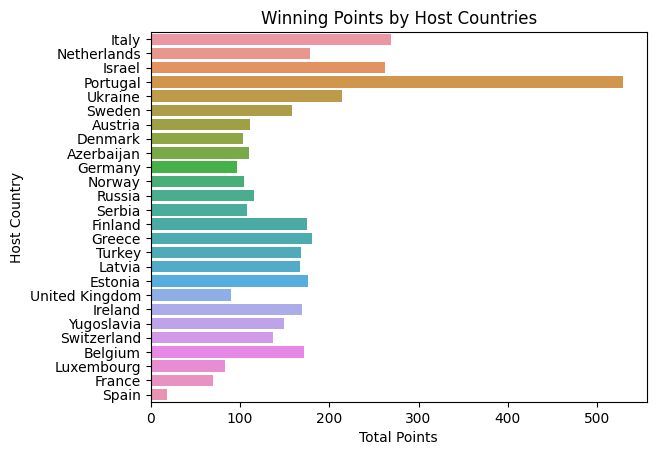

In [215]:
#winning points by host countries

winner = eurovision.loc[eurovision['winner'] == True]

sb.barplot(data=winner, y=winner['host_country'], x=winner['total_points'], errorbar = None)

plt.title("Winning Points by Host Countries")
plt.xlabel("Total Points")
plt.ylabel("Host Country")

plt.show()

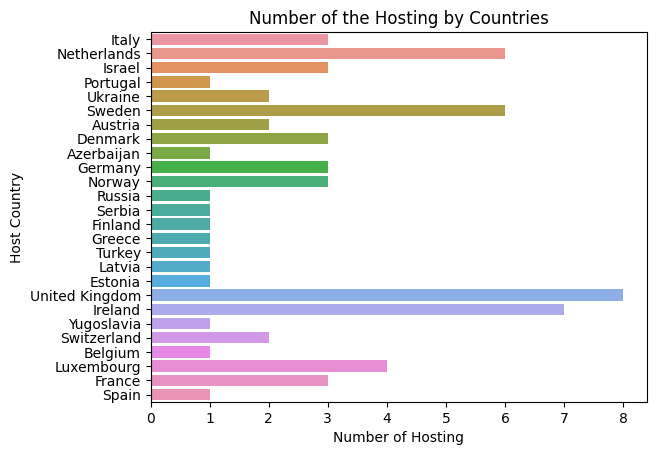

In [216]:
#number of the hosting by countries

host = eurovision.drop_duplicates(subset=['year', 'host_country'])
sb.countplot(y='host_country', data= host)

plt.title("Number of the Hosting by Countries")
plt.ylabel("Host Country")
plt.xlabel("Number of Hosting")

plt.show()

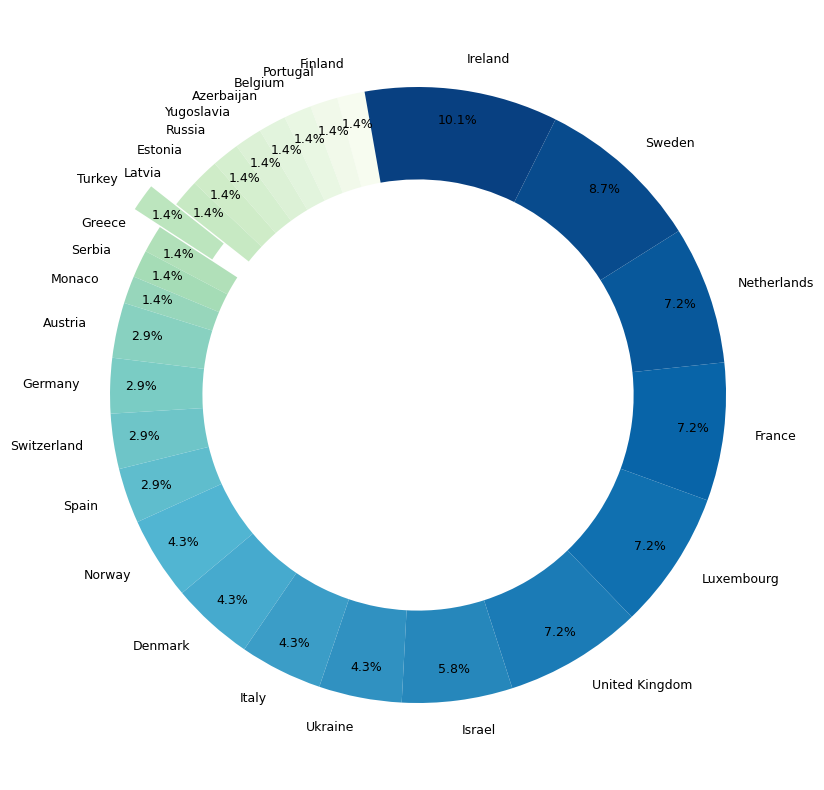

In [217]:
#win rate by country

winners = eurovision[eurovision['winner'] == True]
winners1 = winners[winners['section'] == 'grand-final']
winners2 = winners[winners['section'] == 'final']
winners = [winners1, winners2]
winners = pd.concat(winners)

fig1, ax1 = plt.subplots(figsize=(10, 10))

winners['artist_country'].nunique()

winners['artist_country'].value_counts().sort_values(ascending=True).plot(kind = "pie", cmap='GnBu', autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.1, startangle=100, textprops={'fontsize': 9}, wedgeprops=dict(width=0.3), explode=[0.1 if i == 'Turkey' else 0 for i in winners['artist_country'].value_counts().sort_values(ascending=True).index], ax=ax1)
plt.ylabel('')
plt.show()

------------

#TURKEY

-Turkey has won the contest  1  time(s).


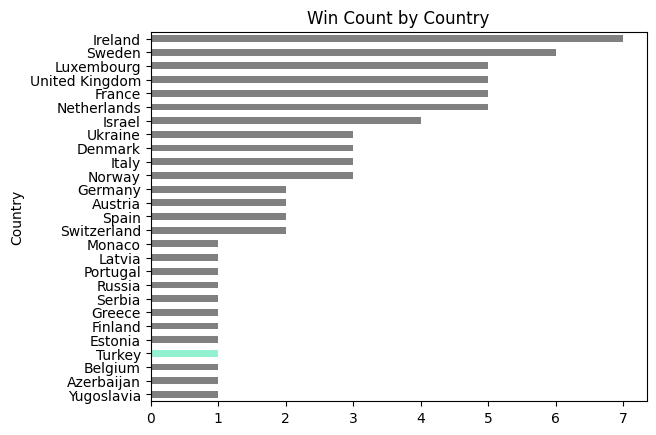

In [224]:
#how many times Turkey won the contest

turkey = winners[winners.artist_country == "Turkey"]

data = winners.groupby(['artist_country']).size().sort_values(ascending=True)

print("-Turkey has won the contest ",len(turkey)," time(s).")

fig, ax = plt.subplots()
ax = data.plot(kind='barh', color = "grey", legend=False)

pos = data.index.get_loc('Turkey')
ax.patches[pos].set_facecolor('#92F2CF')

plt.title("Win Count by Country")
plt.ylabel("Country")
plt.show()

In [219]:
#winner of Turkey

artist = turkey.artist.item()
song = turkey.song.item()
year = turkey.year.item()

print("-The winner of Turkey is ", artist," with the song ", song," in ", year,".")

-The winner of Turkey is  Sertab Erener  with the song  Everyway That I Can  in  2003 .


----------------------

#POINTS

-Biggest margin in contest is  169 .


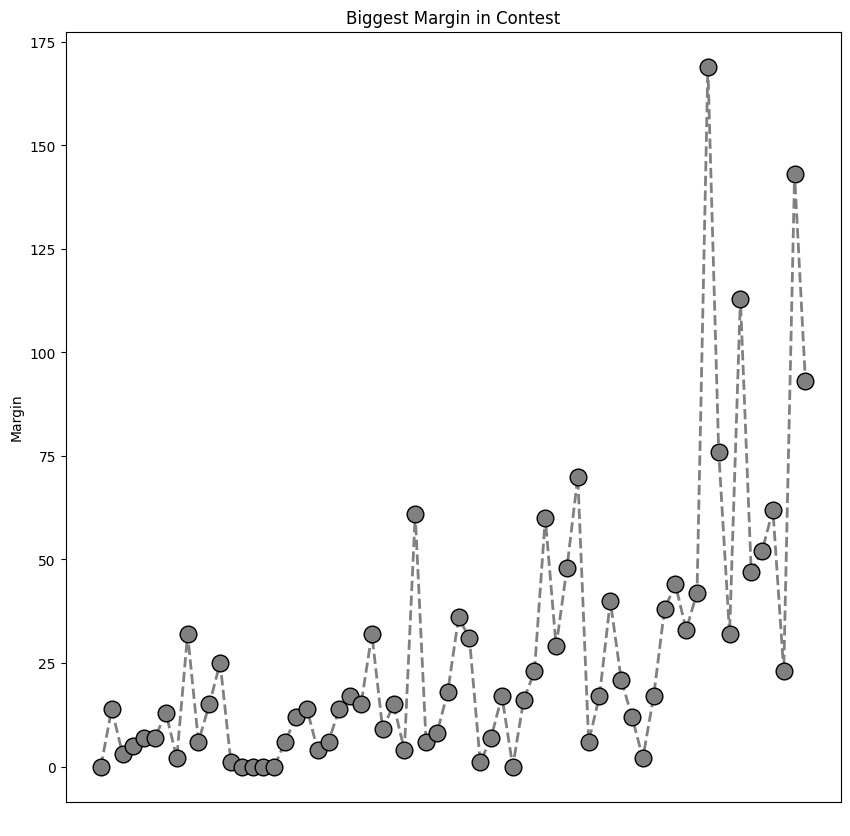

In [318]:
#find the max margin between winner and runner-up

df = points.copy()

fig = plt.figure(figsize=(10, 10))

y = df['Margin'].replace('Not announced', "0").replace('No runner-up', "0").astype(int)

print("-Biggest margin in contest is ", y.max(), ".")

y.nunique()

# colors = []
# for i in y:
#   if i == y.max():
#     colors.append("blue")
#   else:
#     colors.append("grey")

y.plot(color="grey", marker='o', linestyle='dashed', linewidth=2, markersize=12, markeredgecolor= "black")


plt.title("Biggest Margin in Contest")
plt.xlabel(" ")
plt.xticks([])
plt.ylabel("Margin")

plt.show()


--------------------------

#JURY

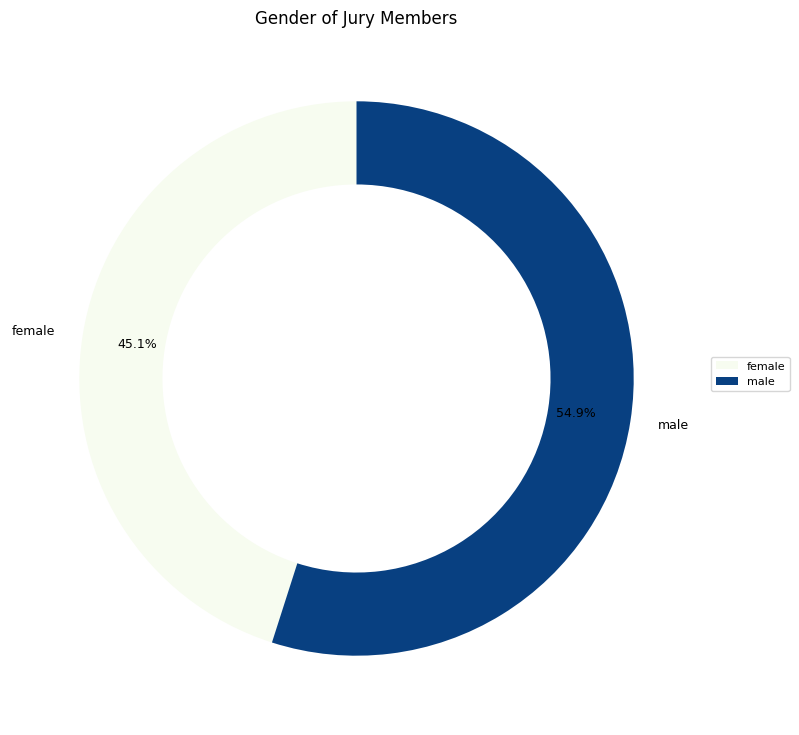

In [221]:
#gender of jury members

fig1, ax1 = plt.subplots(figsize=(9, 9))

jury.groupby(['gender']).size().sort_values(ascending=True).plot(kind = "pie", cmap='GnBu', autopct='%1.1f%%' , pctdistance=0.8, labeldistance=1.1, startangle=90, textprops={'fontsize': 9}, wedgeprops=dict(width=0.3), ax=ax1)

plt.title("Gender of Jury Members")
plt.legend(
    bbox_to_anchor = (1, 0.5), loc='center right', fontsize=10, 
    bbox_transform=plt.gcf().transFigure,
    prop={'size': 8},
)
plt.show()

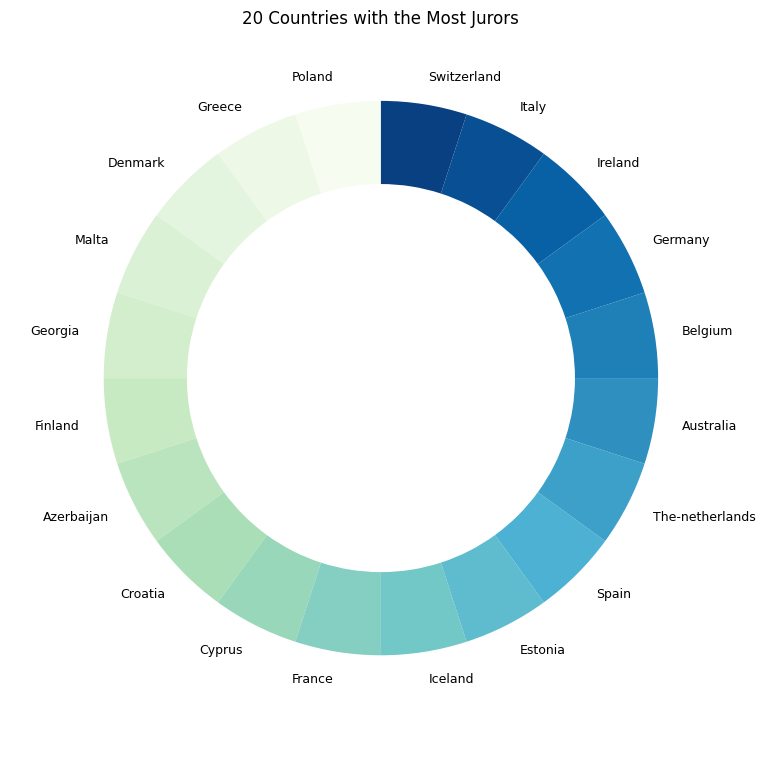

In [222]:
#country of jury members

fig1, ax1 = plt.subplots(figsize=(9, 9))

jury["jury-country"].nunique()

jury["jury-country"].value_counts().head(20).plot(kind = "pie", cmap='GnBu' , pctdistance=0.8, labeldistance=1.1, startangle=90, textprops={'fontsize': 9}, wedgeprops=dict(width=0.3), ax=ax1)
labels = ["%s" % i for i in jury["jury-country"].value_counts()]

total = sum(jury["jury-country"].value_counts())
plt.title("20 Countries with the Most Jurors")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

----------

#RYTHEM

In [223]:
# SUCCESS_SYMBOLS = [
#     TextPath((0, 0), "☹"),
#     TextPath((0, 0), "😒"),
#     TextPath((0, 0), "☺"),
# ]

# data = zip(features['danceability'].astype(int), features['energy'].astype(int), features['tempo'].astype(int))

# cmap = plt.colormaps["plasma"]
# fig, ax = plt.subplots()
# fig.suptitle("Throwing success")
# for danceability, energy, tempo in data:
#     t = Affine2D().scale(energy).rotate_deg(tempo)
#     m = MarkerStyle(SUCCESS_SYMBOLS[danceability], transform=t)
#     ax.plot(energy, marker=m, color=cmap(tempo))
# fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 9), cmap=cmap),
#              ax=ax, label="Normalized Thrust [a.u.]")
# ax.set_xlabel("X position [m]")
# ax.set_ylabel("Y position [m]")

# plt.show()